<a href="https://colab.research.google.com/github/kotlaanurag/LANGGRAPH_WITH_ASTRA_DB-WIKI_SEARCH/blob/master/LANGGRAPH_WITH_ASTRA_DB%2BWIKI_SEARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successful

In [4]:
import cassio
ASTRA_DB_APPLICATION_TOKEN="AstraCS:kQxvdIIBUXKLtLXGoWsojSrM:c60bfb812325183bc855cf0141ab86174b1fd9422de16939d0bf126cbcdbddd1"
ASTRA_DB_ID="89e1a6b4-700b-4983-aeaa-a0172bc2c16e"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)


In [5]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00


In [6]:
!pip install langchain_community
!pip install -u langchain_community tiktoken langchain_groq langchainhub chromadb langchain langgraph langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.9 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
urls=["https://lilianweng.github.io/posts/2023-06-23-agent/"]

In [8]:
docs=[WebBaseLoader(url).load() for url in urls]
docs_list=[item for sublist in docs for item in sublist]
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000,chunk_overlap=0)
docs_split=text_splitter.split_documents(docs_list)

In [9]:
docs_split

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n

In [10]:
from google.colab import userdata
userdata.get('HF_TOKEN')
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 6.6 MB/s eta 0:00:00


In [40]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store=Cassandra(embedding=embeddings,session=None,keyspace=None,table_name="First_project")
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
#astra_vector_index=VectorStoreIndexWrapper(vectorstore=astra_vector_store)
retriver=astra_vector_store.as_retriever()
retriver.invoke("what is agent?")



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[Document(metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log"}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n

In [41]:
#LANG GRAPH APPLICATION
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


In [42]:
#Data model
class RouteQuery(BaseModel):
  """Route a user query to the most relevant datasource"""
  datasource: Literal["vectorstore","wiki_search"]=Field(description="given A user question choose to route it to wikipedia or a vectorstore")


In [43]:
!pip install langchain-groq
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key=userdata.get('groq_api_key')
llm=ChatGroq(model_name="Llama-3.1-70b-versatile",groq_api_key=groq_api_key)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e258b441330>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e258d117a60>, model_name='Llama-3.1-70b-versatile', groq_api_key=SecretStr('**********'))

In [44]:
structured_llm_router=llm.with_structured_output(RouteQuery)
#prompt
System="""you are an expert at routing a user question to a vectorstore or wikipedia the vector store contains documents related to agents,prompt engineering and adversarial attacks .use the vector store for questions on these topics otherwise,use wiki-search
"""
route_prompt=ChatPromptTemplate.from_messages([("system",System),("human","{question}")])
question_router=route_prompt|structured_llm_router


In [45]:
!pip install wikipedia
!pip install langchain_community
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [46]:
from typing import Optional, List
from typing_extensions import TypedDict
class Graphstate(TypedDict):
  """State of the graph
  Attributes:
          question=question
          generation=LLMgeneration
          documents:list of documents
          """

  question:str
  generation:Optional[str]
  documents:Optional[List[str]]


In [61]:
from langchain.schema import Document
def retrive(state):
  question=state["question"]
  documents=retriver.invoke(question)
  return{"documents":documents,"question":question}
def wiki_search(state):
  question=state["question"]
  docs=wiki.invoke({"query":question})
  wiki_results=Document(page_content=docs)
  return{"documents":wiki_results,"question":question}
def route_question(state):
  question=state["question"]
  source=question_router.invoke({"question":question})
  if source.datasource=="wiki_search":
    return "wiki_search"
  elif source.datasource=="vectorstore":
    return "vectorstore"


In [62]:
from langgraph.graph import END,StateGraph,START
workflow=StateGraph(Graphstate)
workflow.add_node("wiki_search",wiki_search)
workflow.add_node("retrive",retrive)

#Build the graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
       "wiki_search":"wiki_search",
       "vectorstore":"retrive",

    }
)
workflow.add_edge("retrive",END)
workflow.add_edge("wiki_search",END)
app=workflow.compile()

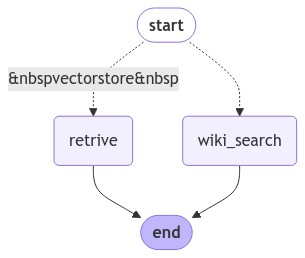

In [64]:
from IPython.display import display, Markdown,Image
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except:
  pass

In [65]:
from pprint import pprint
inputs={"question":"what is agent?"}
# Use execute instead of run
for output in app.stream(inputs):
  for key,value in output.items():
    pprint(f"{key}:{value}")
    if 'documents' in value and len(value['documents']) > 0 and 'description' in value['documents'][0].dict()['metadata']:
        pprint(value['documents'][0].dict()['metadata']['description'])

("retrive:{'question': 'what is agent?', 'documents': "
 "[Document(metadata={'description': 'Building agents with LLM (large language "
 'model) as its core controller is a cool concept. Several proof-of-concepts '
 'demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring '
 'examples. The potentiality of LLM extends beyond generating well-written '
 'copies, stories, essays and programs; it can be framed as a powerful general '
 'problem solver.\\nAgent System Overview In a LLM-powered autonomous agent '
 'system, LLM functions as the agent’s brain, complemented by several key '
 "components:', 'language': 'en', 'source': "
 '\'https://lilianweng.github.io/posts/2023-06-23-agent/\', \'title\': "LLM '
 'Powered Autonomous Agents | Lil\'Log"}, page_content="LLM Powered Autonomous '
 'Agents | '
 "Lil'Log\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\nLil'Log\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n\\n